# Introduction to Regression with Neural Networks in TensorFlow
- There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables.

## Import TensorFlow


In [2]:
import tensorflow as tf
tf.__version__

'2.14.0'

## Creating a data to fit

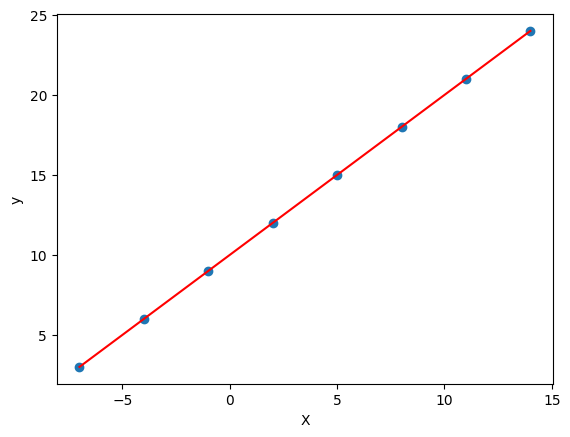

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])
y = np.array([3., 6., 9., 12., 15., 18., 21., 24. ])

# Visualize
plt.scatter(X, y)
plt.plot(X, y, color="red")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

- From graph, it can be seen that, y = X + 10.

X -> input features, independent variable
y -> output feature, dependent variable

## Input and output shapes


In [4]:
# Create a demo tensor for our housing price prediction problem

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

## Turn our Numpy array into tensors

In [6]:
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

## Steps in modelling with TensorFlow


1.   Creating a model - define the input and output layers, as well as the hidden layers of a deep learning
2.   Compiling a model - define  the loss function ( in other words, the function that tells our model how wrong it is) and the optimizer ( tells our model how to improve the patterns its learning) and evalution metrics ( what we can use to interpret the performance of our model)
3. Fittin a model - letting the model try to find patterns betwene X & y (features and labels).



In [7]:
# Set random seed

tf.random.set_seed(42)

# 1. Create a model using the Sequential API

# Sequential groups a linear stack of layers into a tf.keras.Model.
# Sequential provides training and inference features on this model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # we have 1 input and want 1 output. that's why it's 1
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae, # mae => mean absolute error
    optimizer=tf.keras.optimizers.SGD(), # SGD => stochastic gradient descent
    metrics=["mae"]
              )

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)


Epoch 1/5
1/1 [==============================] - 6s 6s/step - loss: 13.9684 - mae: 13.9684
Epoch 2/5
1/1 [==============================] - 0s 13ms/step - loss: 13.8359 - mae: 13.8359
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 13.7034 - mae: 13.7034
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 13.5709 - mae: 13.5709
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 13.4384 - mae: 13.4384


In [8]:
# Check out X, y

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

## Try and make a prediction using our model

In [9]:
y_pred = model.predict([17.])
y_pred

1/1 [==============================] - 0s 126ms/step


array([[0.7497671]], dtype=float32)

- Performance of our model is worse than shit. We have to improve it.

## Improve our model

we can improve our model, by altering the steps we took to create a model

1.   **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2.   **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it traning for longer) or on more data (give the model more examples to learn from)

In [10]:
# Let's rebuild our model

# 1. Create the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 735ms/step - loss: 13.1770 - mae: 13.1770
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 13.0445 - mae: 13.0445
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 12.9120 - mae: 12.9120
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 12.7795 - mae: 12.7795
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 12.6470 - mae: 12.6470
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 12.5145 - mae: 12.5145
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 12.3820 - mae: 12.3820
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 12.2495 - mae: 12.2495
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 12.1170 - mae: 12.1170
Epoch 10/100
1/1 [==============================] - 0s 20ms/step - loss: 11.9845 - mae: 11.9845
Epoch 11/100
1/1 [==============================

## Try and make a prediction using our new model

In [11]:
y_pred = model.predict([17.])
y_pred

1/1 [==============================] - 0s 118ms/step


array([[29.803982]], dtype=float32)

- ***It's much better than before. Let's continue to improve our model***

In [12]:
# 1. Create the model with an extra hidden layer with 100 hidden units
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=["mae"]
    )

# 3. Fit the model

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 14.2889 - mae: 14.2889
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 13.1679 - mae: 13.1679
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 12.0536 - mae: 12.0536
Epoch 4/100
1/1 [==============================] - 0s 22ms/step - loss: 10.9305 - mae: 10.9305
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 9.7811 - mae: 9.7811
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 8.8371 - mae: 8.8371
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 7.9305 - mae: 7.9305
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 6.9695 - mae: 6.9695
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 5.9469 - mae: 5.9469
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 4.8539 - mae: 4.8539
Epoch 11/100
1/1 [==============================] - 0s 12ms/ste

In [13]:
y_pred = model.predict([17.])
y_pred

1/1 [==============================] - 0s 216ms/step


array([[30.5048]], dtype=float32)

**It is worse than before model. Because our model is overfitted**

Common ways to improve a deep model:
1.   Adding layers
2.   Increase the number of hidden units
3.   Change the activation function
4.   Change the optimization function
5.   Change the learning rate
6.   Fitting on more data
7. Fitting for longer




## Evaluating the model

In practice, a typical workflow you'll go through when building neural networks is:

Build a model -> fit it > evaluate it -> tweak it -> fit it > evaluate it -> tweak it -> fit it > evaluate it -> tweak it


When it comes to evaluation... there are 3 words you should memorize:

***Visualize, visualize, visualize***

It's a good idea to visualize:
* the data - what data are we working within ? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns ?
* The predictions of the model - how do the predictions of a model line up agains the ground truth ( the original label )

In [14]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [15]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

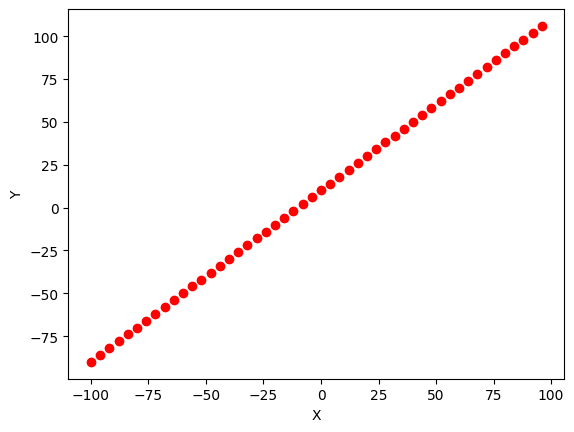

In [16]:
# Let's visualize the data

plt.scatter(X, y, color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - The model gets evaluated on this data to test what is has learned, this set is typically 10-15%.

In [17]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80%)
X_test = X[40:] # last 10 are testing samples (20%)

y_train = y[:40]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visiualize it again.

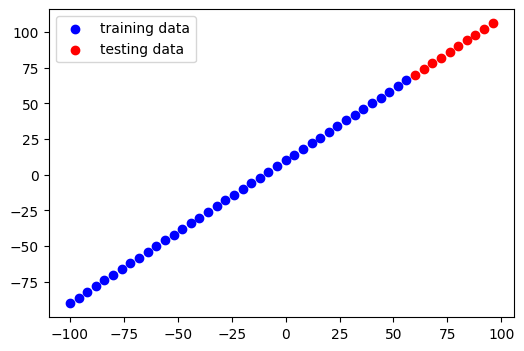

In [18]:
plt.figure(figsize=(6, 4))
plt.scatter(X_train, y_train, color="blue", label="training data")
plt.scatter(X_test, y_test, c="red", label="testing data")
plt.legend()
plt.show()

In [21]:
# Let's have a look at how to build a neural networks for our data

# 1. create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
    )

# 3. Fit the model

#model.fit(tf.expand_dims(X_train, axis=-1), y, epochs=100)


In [23]:
model.summary()

ValueError: ignored

In [37]:
# Let's create a model which builds automatically by defining the input_shape arg

tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1] ) # X[0] and y[0] is just a number. that's why we put 1
])

# 2. Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"])


In [38]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Visualizing the model

ValueError: ignored